<a href="https://colab.research.google.com/github/Juyeon-music/Playdata/blob/master/07_1_cifar10_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
label = ['비행기', '자동차', '새', '고양이', '사슴', '개', '개구리', '말', '배', '트럭']
label_eng = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [3]:
np.random.seed(1)
tf.random.set_seed(1)

In [4]:
# 데이터 로딩
(train_image, train_label), (test_image, test_label) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [5]:
train_image.shape, test_image.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [6]:
np.unique(train_label, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

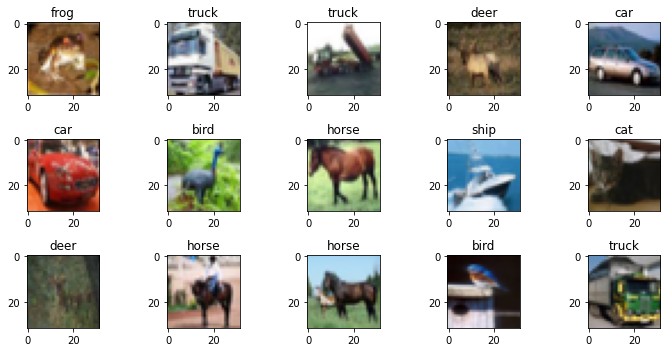

In [7]:
# 15개 이미지 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(train_image[i])
    plt.title(label_eng[train_label[i][0]])
plt.tight_layout()
plt.show()

In [8]:
N_TRAIN = train_image.shape[0]
N_TEST = test_image.shape[0]

In [9]:
# 정규화
X_train, X_test = train_image/255., test_image/255.
y_train, y_test = train_label, test_label

In [10]:
# 하이퍼파라미터 설정
LEARNING_RATE = 0.001
N_EPOCHS = 20
N_BATCHS = 100
N_CLASS = 10

In [11]:
# dataset 구성
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

### CNN 모델 생성

In [12]:
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((32,32,3)))
    
    model.add(keras.layers.Conv2D(filters=32,
                                  kernel_size=3,
                                  padding='same',
                                  strides=1,
                                  activation='relu'))
    model.add(keras.layers.MaxPool2D(padding='same'))
    model.add(keras.layers.Conv2D(filters=64,
                            kernel_size=3,
                            padding='same',
                            strides=1,
                            activation='relu'))
    model.add(keras.layers.MaxPool2D(padding='same'))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation='relu'))
    # 출력층
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))

    return model

In [13]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1048832   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
steps_per_epoch = N_TRAIN // N_BATCHS
validation_steps = int(np.ceil(N_TEST/N_BATCHS))

In [16]:
history = model.fit(train_dataset,
                    epochs=N_EPOCHS,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=test_dataset,
                    validation_steps=validation_steps)

Epoch 1/20
500/500 [==============================] - 34s 7ms/step - loss: 1.7032 - accuracy: 0.3856 - val_loss: 1.1510 - val_accuracy: 0.6036
Epoch 2/20
500/500 [==============================] - 4s 6ms/step - loss: 1.0940 - accuracy: 0.6174 - val_loss: 1.0056 - val_accuracy: 0.6508
Epoch 3/20
500/500 [==============================] - 4s 6ms/step - loss: 0.9322 - accuracy: 0.6700 - val_loss: 0.9395 - val_accuracy: 0.6698
Epoch 4/20
500/500 [==============================] - 4s 6ms/step - loss: 0.8105 - accuracy: 0.7185 - val_loss: 0.8740 - val_accuracy: 0.6983
Epoch 5/20
500/500 [==============================] - 4s 6ms/step - loss: 0.7206 - accuracy: 0.7501 - val_loss: 0.8982 - val_accuracy: 0.6901
Epoch 6/20
500/500 [==============================] - 4s 6ms/step - loss: 0.6399 - accuracy: 0.7764 - val_loss: 0.8525 - val_accuracy: 0.7055
Epoch 7/20
500/500 [==============================] - 4s 7ms/step - loss: 0.5565 - accuracy: 0.8084 - val_loss: 0.8605 - val_accuracy: 0.7123
Epoch

In [17]:
model.evaluate(test_dataset)    # 과적합이 일어났다.

100/100 [==============================] - 1s 4ms/step - loss: 1.8693 - accuracy: 0.6957


[1.8692580461502075, 0.6956999897956848]

In [18]:
def plot_result(history, ymin=None, ymax=None):
    """
    학습 결과를 시각화 해주는 함수
    """
    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    plt.plot(range(1,N_EPOCHS+1), history.history['loss'], label='Train loss')
    plt.plot(range(1,N_EPOCHS+1), history.history['val_loss'], label='Val loss')
    plt.title('LOSS')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    if ymin!=None and ymax!=None:    # !=None 생략 가능 (True면 if 구문 실행되는 것이기 때문에)
        plt.ylim(ymin, ymax)
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(range(1,N_EPOCHS+1), history.history['accuracy'], label='Train accuracy')
    plt.plot(range(1,N_EPOCHS+1), history.history['val_accuracy'], label='Val accuracy')
    plt.title('ACCURACY')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    if ymin!=None and ymax!=None:
        plt.ylim(ymin, ymax)
    plt.legend()

    plt.tight_layout()
    plt.show()

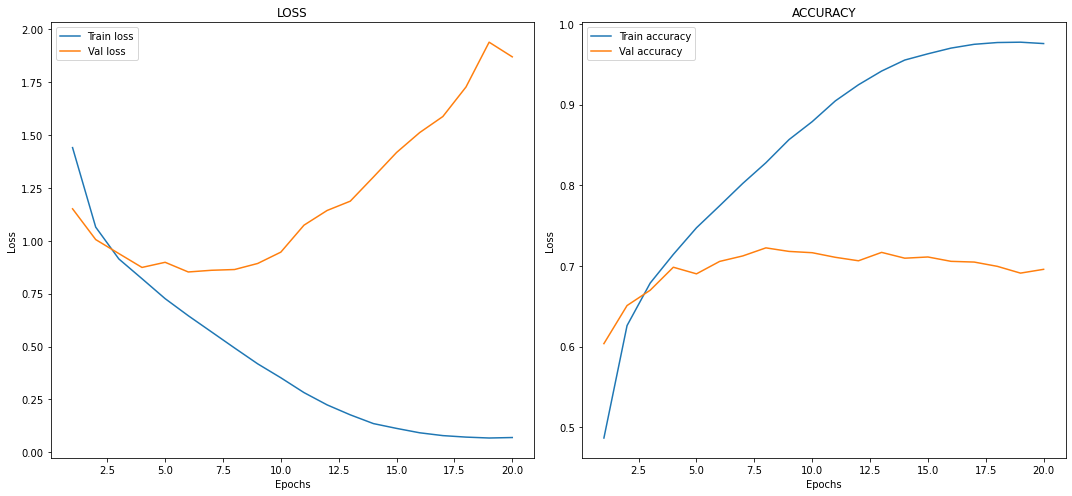

In [19]:
plot_result(history)